# Libg3n Parsing Techniques Evaluation

In order to be able to choose an adequate technique to be able to parse our custom DSL, we need to evaluate multiple of these techniques first.

*The following techniques are going to be evaluated and compared:*

- Parsing with an complete custom build Parser
- Parsing with help of the Pyparsing module
- Parsing an YAML config
- Parsing an XML config

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

RUNS = 20

## Measuring Technique

To measure the results we use an combination of the python performance timer functionality and an custom class. This custom class is going to measure the execution time of the different techniques. Thus the execution time is measured multiple times in a row to avoid false measurements due to system load or caching mechanisms.

In [16]:
import time


class PerformanceTimer:
    timers = {}

    def __init__(self, name: str = "", iterations: int = 20):
        self.running = False
        self.start = None
        self.name = name
        self.elapsed = 0.0
        self.measurements = {}
        self.iterations = iterations

        PerformanceTimer.timers[self.name] = self

    def measure_function(self, func, *args):
        for i, arg in enumerate(args):
            self.measurements[i] = []
            for j in range(self.iterations):
                self.start_timer()
                func(arg)
                self.stop_timer()
                self.measurements[i].append(self.elapsed)
                self.reset()

    def start_timer(self):
        if self.running is False:
            self.start = time.perf_counter()
            self.running = True
        else:
            raise Exception('Timer already started.')

    def stop_timer(self):
        if self.running is True:
            # Elapsed time in ms
            self.elapsed = (time.perf_counter() - self.start) * 1000
            self.running = False
        else:
            raise Exception('Timer is not running.')

    def reset(self):
        self.start = None
        self.elapsed = 0.0
        self.running = False

    def average_time(self):
        return sum(self.measurements) / len(self.measurements)

    def print(self):
        print(('Timer: ' + self.name).center(50, '-'))
        print('Running: ' + str(self.running))

        if self.measurements:
            print('Measured Times: ' + str(self.measurements))
            print('Average: ' + str(self.average_time()))
        else:
            print('Elapsed Time: ' + str(self.elapsed))

        print('\n')

## Manual Parsing

In [17]:
from parse_manual.parser import parse as parse_manual

manual_timer = PerformanceTimer('Manual Parsing', RUNS)
manual_timer.measure_function(parse_manual, './samples/sample.gen', './samples/sample-40.gen', './samples/sample-80.gen', './samples/sample-160.gen')
manual_timer.print()

--------------Timer: Manual Parsing---------------
Running: False
Measured Times: {0: [13.23619999999437, 1.0424000000170963, 0.9936999999808904, 0.7634000000393826, 0.6963999999811676, 0.7297000000221487, 0.6740000000036162, 1.144100000033177, 1.52799999995068, 1.089600000000246, 1.0662999999908607, 0.8155000000442669, 0.7524000000103115, 0.8564999999975953, 0.9780999999975393, 1.1147000000164553, 0.924600000018927, 1.1168999999995322, 1.0179000000221095, 0.838400000020556], 1: [12.785599999972419, 1.5799999999899228, 1.7356999999833533, 1.397800000006555, 1.4151999999967302, 1.5207000000145854, 2.5509999999826505, 1.7225000000280488, 1.9533999999907792, 1.486499999998614, 1.5463000000295324, 1.558799999997973, 1.5702000000032967, 1.6261000000099557, 1.4499000000114393, 2.5539000000094347, 1.6838000000234388, 1.4807000000018888, 1.446400000020276, 2.5828000000274187], 2: [30.43659999997317, 2.724199999988741, 2.888600000005681, 2.550799999994524, 4.666699999972934, 3.3925999999837586,

### Function execution time development

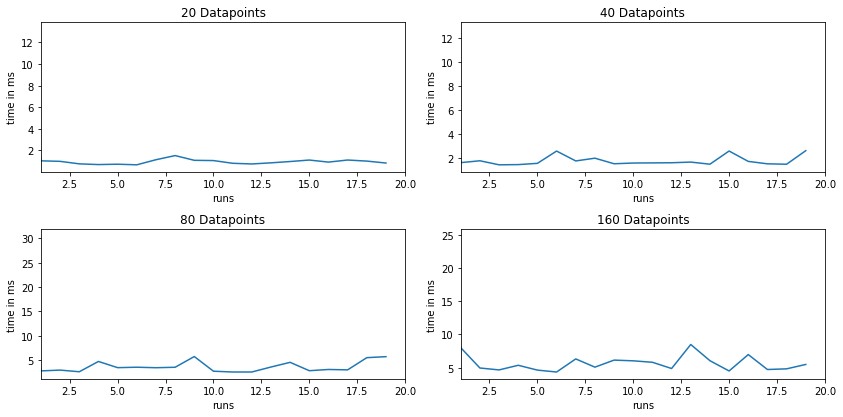

In [18]:
plt.subplot(2,2,1)
plt.plot(manual_timer.measurements[0])
plt.title('20 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,2)
plt.plot(manual_timer.measurements[1])
plt.title('40 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,3)
plt.plot(manual_timer.measurements[2])
plt.title('80 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,4)
plt.plot(manual_timer.measurements[3])
plt.title('160 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.rcParams['figure.figsize'] = [30/2.54, 15/2.54]
plt.tight_layout()
plt.show()

### Individual function execution time results

In [19]:
df = pd.DataFrame(manual_timer.measurements)
df.columns = ['20 Datapoints', '40 Datapoints', '80 Datapoints', '160 Datapoints']
df

,20 Datapoints,40 Datapoints,80 Datapoints,160 Datapoints
0,13.2362,12.7856,30.4366,24.7984
1,1.0424,1.5800,2.7242,7.9988
2,0.9937,1.7357,2.8886,4.9410
3,0.7634,1.3978,2.5508,4.6547
4,0.6964,1.4152,4.6667,5.3518
5,0.7297,1.5207,3.3926,4.6240
6,0.6740,2.5510,3.4833,4.3381
7,1.1441,1.7225,3.3800,6.3087
8,1.5280,1.9534,3.4740,5.0708
9,1.0896,1.4865,5.6778,6.1311


## Pyparsing

In [20]:
from parse_pyparsing.parser import parse as parse_pyparsing

# Pyparsing
pyparsing_timer = PerformanceTimer('Pyparsing', RUNS)
pyparsing_timer.measure_function(parse_pyparsing, './samples/sample.gen', './samples/sample-40.gen', './samples/sample-80.gen', './samples/sample-160.gen')
pyparsing_timer.print()

-----------------Timer: Pyparsing-----------------
Running: False
Measured Times: {0: [11.951899999985471, 8.076499999958742, 10.270699999978206, 9.204300000021703, 11.052899999981491, 10.835499999984677, 8.442400000035377, 11.40739999999596, 7.165499999985059, 9.91790000000492, 8.375499999999647, 7.799000000034084, 6.712599999957547, 7.273399999974117, 6.619199999988723, 8.974800000032701, 6.636999999955151, 7.886600000006183, 6.061499999987063, 6.787000000031185], 1: [13.498200000015004, 12.989600000025803, 12.11310000002186, 10.81949999996823, 12.572599999998602, 11.694299999987834, 11.092899999994188, 12.72900000003574, 12.962200000004032, 12.934699999959776, 12.639100000001235, 12.306200000011813, 12.286200000005465, 13.483299999961673, 12.266500000009728, 11.662999999998647, 12.185600000009345, 12.820099999999002, 11.201500000026954, 12.691999999958625], 2: [26.91149999998288, 25.1524000000245, 27.21350000001621, 25.663099999974293, 24.76459999996905, 26.206399999978203, 24.60880

### Function execution time development

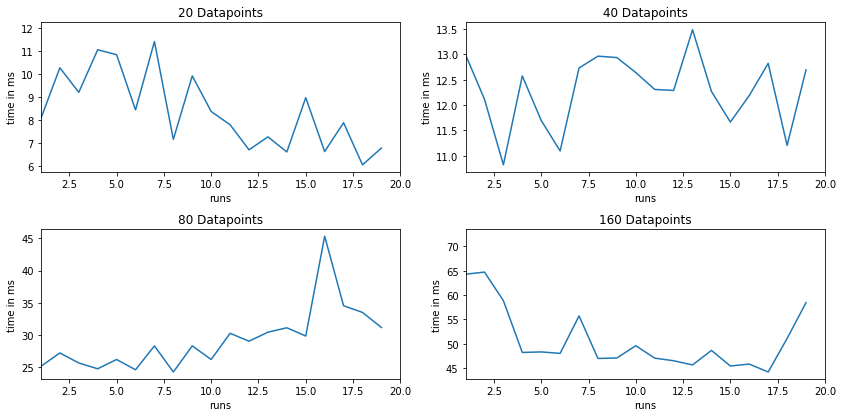

In [21]:
plt.subplot(2,2,1)
plt.plot(pyparsing_timer.measurements[0])
plt.title('20 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,2)
plt.plot(pyparsing_timer.measurements[1])
plt.title('40 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,3)
plt.plot(pyparsing_timer.measurements[2])
plt.title('80 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,4)
plt.plot(pyparsing_timer.measurements[3])
plt.title('160 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.rcParams['figure.figsize'] = [30/2.54, 15/2.54]
plt.tight_layout()
plt.show()

### Individual function execution time results

In [22]:
df = pd.DataFrame(pyparsing_timer.measurements)
df.columns = ['20 Datapoints', '40 Datapoints', '80 Datapoints', '160 Datapoints']
df

,20 Datapoints,40 Datapoints,80 Datapoints,160 Datapoints
0,11.9519,13.4982,26.9115,72.0641
1,8.0765,12.9896,25.1524,64.2592
2,10.2707,12.1131,27.2135,64.6919
3,9.2043,10.8195,25.6631,58.8295
4,11.0529,12.5726,24.7646,48.1976
5,10.8355,11.6943,26.2064,48.3068
6,8.4424,11.0929,24.6088,48.0066
7,11.4074,12.7290,28.3070,55.6955
8,7.1655,12.9622,24.2645,46.9651
9,9.9179,12.9347,28.3170,47.0673


## YAML Parsing

In [23]:
from parse_yaml.parser import parse as parse_yaml

#YAML
yaml_timer = PerformanceTimer('YAML Parsing', RUNS)
yaml_timer.measure_function(parse_yaml, './samples/sample.yaml', './samples/sample-40.yaml', './samples/sample-80.yaml', './samples/sample-160.yaml')
yaml_timer.print()

---------------Timer: YAML Parsing----------------
Running: False
Measured Times: {0: [26.78710000003548, 19.306700000015553, 19.327099999998154, 16.937199999972563, 21.046299999966323, 113.27189999997245, 16.176400000006197, 18.083199999978206, 17.919099999971877, 17.741300000011506, 17.602199999998902, 18.229200000007495, 18.097899999986566, 18.559899999956997, 18.462300000010146, 16.95879999999761, 21.232100000020182, 19.209900000021207, 20.480399999996735, 19.620900000006714], 1: [47.645299999999224, 46.7954000000077, 46.366299999988314, 40.461700000037126, 36.255700000026536, 39.26810000001524, 41.50359999999864, 37.77730000001611, 37.460699999996905, 32.94770000002245, 33.193900000014764, 31.80510000004233, 31.674299999963296, 39.16959999997971, 35.47129999998333, 41.669500000011794, 37.85759999999527, 37.485800000013114, 33.751900000027035, 32.061800000008134], 2: [75.91580000001841, 64.68739999996842, 66.06489999995802, 68.55300000000852, 71.16350000001148, 76.36220000000549, 8

### Function execution time development

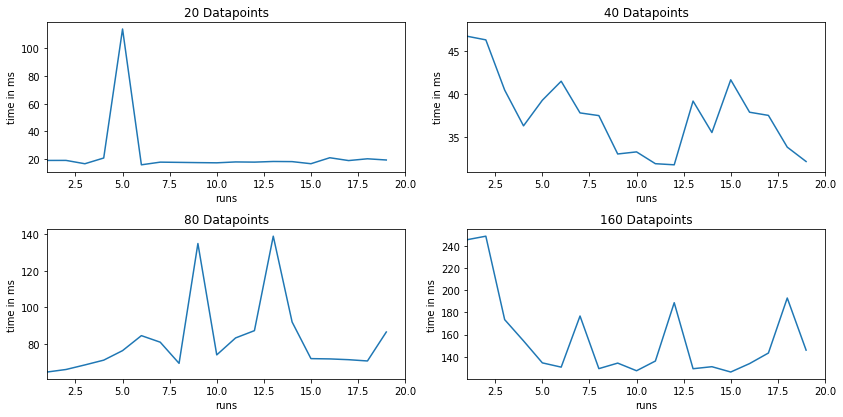

In [24]:
plt.subplot(2,2,1)
plt.plot(yaml_timer.measurements[0])
plt.title('20 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,2)
plt.plot(yaml_timer.measurements[1])
plt.title('40 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,3)
plt.plot(yaml_timer.measurements[2])
plt.title('80 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,4)
plt.plot(yaml_timer.measurements[3])
plt.title('160 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.rcParams['figure.figsize'] = [30/2.54, 15/2.54]
plt.tight_layout()
plt.show()

### Individual function execution time results

In [25]:
df = pd.DataFrame(yaml_timer.measurements)
df.columns = ['20 Datapoints', '40 Datapoints', '80 Datapoints', '160 Datapoints']
df

,20 Datapoints,40 Datapoints,80 Datapoints,160 Datapoints
0,26.7871,47.6453,75.9158,205.1222
1,19.3067,46.7954,64.6874,245.3832
2,19.3271,46.3663,66.0649,248.5698
3,16.9372,40.4617,68.5530,173.3868
4,21.0463,36.2557,71.1635,154.2672
5,113.2719,39.2681,76.3622,134.4479
6,16.1764,41.5036,84.5453,130.6018
7,18.0832,37.7773,80.9675,176.6616
8,17.9191,37.4607,69.4227,129.2497
9,17.7413,32.9477,134.8326,134.2333


## XML Parsing

In [26]:
from parse_xml.parser import parse as parse_xml

#XML
xml_timer = PerformanceTimer('XML Parsing', RUNS)
xml_timer.measure_function(parse_xml, './samples/sample.xml', './samples/sample-40.xml', './samples/sample-80.xml', './samples/sample-160.xml')
xml_timer.print()

----------------Timer: XML Parsing----------------
Running: False
Measured Times: {0: [3.060099999970589, 0.6834000000139895, 0.5659000000264314, 0.8144000000243068, 0.9431000000290624, 0.7320000000277105, 0.5573999999910484, 1.193999999998141, 0.977799999986928, 0.5242000000293956, 0.4122000000279513, 0.42469999999639185, 0.3752000000076805, 0.4003000000238899, 0.3937000000178159, 0.44910000002573724, 0.45110000002068773, 0.44660000003204914, 0.4066000000193526, 0.36080000000993095], 1: [7.851500000015221, 0.42139999999335487, 0.3707999999846834, 0.39720000000897926, 0.620299999980034, 1.2080000000196378, 1.2285999999903652, 0.5842000000484404, 0.4645999999866035, 0.4305999999587584, 0.379800000018804, 0.3752000000076805, 0.4076999999824693, 0.3661000000079184, 0.3631000000154927, 0.4016000000319764, 0.37040000000843065, 0.3623000000061438, 0.39670000001024164, 0.3884999999854699], 2: [8.658900000000358, 1.7510999999785781, 1.4078000000381508, 1.729000000011638, 1.1650000000145155, 0.

### Function execution time development

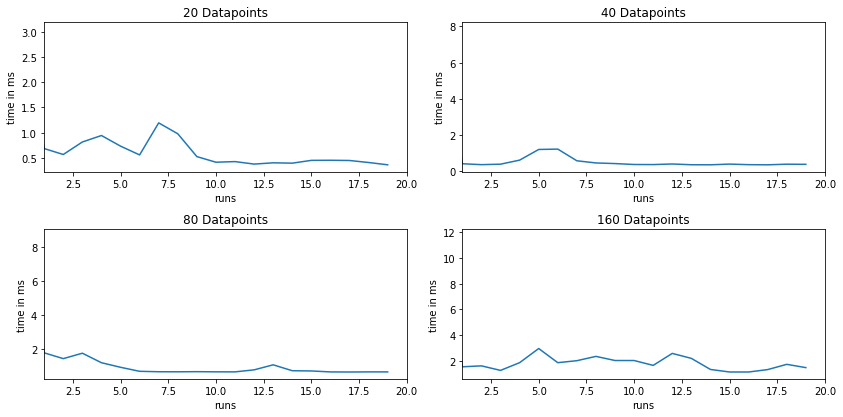

In [27]:
plt.subplot(2,2,1)
plt.plot(xml_timer.measurements[0])
plt.title('20 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,2)
plt.plot(xml_timer.measurements[1])
plt.title('40 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,3)
plt.plot(xml_timer.measurements[2])
plt.title('80 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.subplot(2,2,4)
plt.plot(xml_timer.measurements[3])
plt.title('160 Datapoints')
plt.xlim(1, RUNS)
plt.xlabel('runs')
plt.ylabel('time in ms')

plt.rcParams['figure.figsize'] = [30/2.54, 15/2.54]
plt.tight_layout()
plt.show()

### Individual function execution time results

In [28]:
df = pd.DataFrame(xml_timer.measurements)
df.columns = ['20 Datapoints', '40 Datapoints', '80 Datapoints', '160 Datapoints']
df

,20 Datapoints,40 Datapoints,80 Datapoints,160 Datapoints
0,3.0601,7.8515,8.6589,11.6926
1,0.6834,0.4214,1.7511,1.5427
2,0.5659,0.3708,1.4078,1.6153
3,0.8144,0.3972,1.7290,1.2631
4,0.9431,0.6203,1.1650,1.8635
5,0.7320,1.2080,0.8951,2.9630
6,0.5574,1.2286,0.6570,1.8629
7,1.1940,0.5842,0.6315,2.0173
8,0.9778,0.4646,0.6280,2.3523
9,0.5242,0.4306,0.6355,2.0309
